In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 7, 'axes.linewidth': 1, 'xtick.major.width': 1, 'xtick.major.size': 4, 'ytick.major.width': 1, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

from functools import reduce
import matplotlib.patches as patches
import matplotlib.lines as lines

/data5/deepro/miniconda3/envs/starrseq/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
libs = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

data_dir = "/data7/deepro/starrseq/4_ml_classification_fragment_category/data"

df = pd.DataFrame()

for lib in libs[:-1]:
    dfx = pd.read_csv(f"{data_dir}/{lib}/resnet_mlp.csv.gz", header=None, names=["ypred", "ytarget", "chrm", "start", "end"])
    dfx["lib"] = lib
    dfx["model"] = "resnet"
    df = pd.concat((df, dfx))

    dfy = pd.read_csv(f"{data_dir}/{lib}/linear/homer_linear.csv.gz", header=None, names=["ypred", "ytarget", "chrm", "start", "end"])
    dfy["lib"] = lib
    dfy["model"] = "linear"
    df = pd.concat((df, dfy))


In [39]:
def compare_predictions_peaks_plot(df):
    peak_plot_df = df.loc[df.ytarget==1]
    nonpeak_plot_df = df.loc[df.ytarget==0]
    fig, ax = plt.subplots(1,2,figsize=(6,3))
    sns.histplot(
        data=peak_plot_df, x="ypred", bins=10, hue="model", ax=ax[0], stat="probability", 
        multiple="dodge", hue_order=["linear", "resnet"], shrink=0.8, palette=["skyblue", "indianred"],
        )
    sns.histplot(
        data=nonpeak_plot_df, x="ypred", bins=10, hue="model", ax=ax[1], stat="probability", 
        multiple="dodge", hue_order=["linear", "resnet"], shrink=0.8, palette=["skyblue", "indianred"],
        )

    for iax in ax:
        # iax.set_xlim((0, 1))
        iax.set_ylim((0, 0.5))
        # Remove Spines
        iax.spines['right'].set_visible(False)
        iax.spines['top'].set_visible(False)
    fig.tight_layout()
    return fig


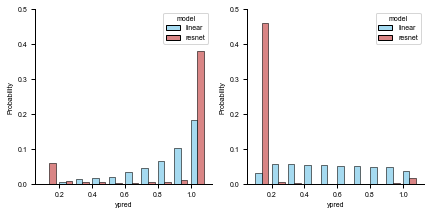

In [40]:
fig = compare_predictions_peaks_plot(df)

In [41]:
def save_pdf(save_file, fig):
    os.makedirs(os.path.dirname(save_file), exist_ok=True)
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [42]:
save_file = "/data7/deepro/starrseq/4_ml_classification_fragment_category/data/figures/prediction_comparison.pdf"
save_pdf(save_file, fig)

In [7]:
df.loc[df.model=="linear"].groupby("ytarget").agg({"ypred": ["mean", "median"]})

ypred          
             mean    median
ytarget                    
0        0.493172  0.482566
1        0.772011  0.844960

In [8]:
df.loc[df.model=="resnet"].groupby("ytarget").agg({"ypred": ["mean", "median"]})

ypred          
             mean    median
ytarget                    
0        0.055393  0.000245
1        0.820084  0.998270